In [1]:
# Importamos librerías necesarias
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN

In [2]:
# Cargamos el dataset spotify
file_path = "SpotifyFeatures.csv"
df = pd.read_csv(file_path)


In [3]:
# Obtener un resumen de la información de la base de datos (tipos de datos, valores nulos, etc.)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [4]:
# Obtener estadísticas descriptivas de las columnas numéricas
print(df.describe())

          popularity   acousticness   danceability   duration_ms  \
count  232725.000000  232725.000000  232725.000000  2.327250e+05   
mean       41.127502       0.368560       0.554364  2.351223e+05   
std        18.189948       0.354768       0.185608  1.189359e+05   
min         0.000000       0.000000       0.056900  1.538700e+04   
25%        29.000000       0.037600       0.435000  1.828570e+05   
50%        43.000000       0.232000       0.571000  2.204270e+05   
75%        55.000000       0.722000       0.692000  2.657680e+05   
max       100.000000       0.996000       0.989000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  232725.000000     232725.000000  232725.000000  232725.000000   
mean        0.570958          0.148301       0.215009      -9.569885   
std         0.263456          0.302768       0.198273       5.998204   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.385000       

In [5]:
#Tamaño del dataset
print(df.shape)
print(type(df.shape))

(232725, 18)
<class 'tuple'>


In [6]:
#Tipos de géneros
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

<Axes: xlabel='genre'>

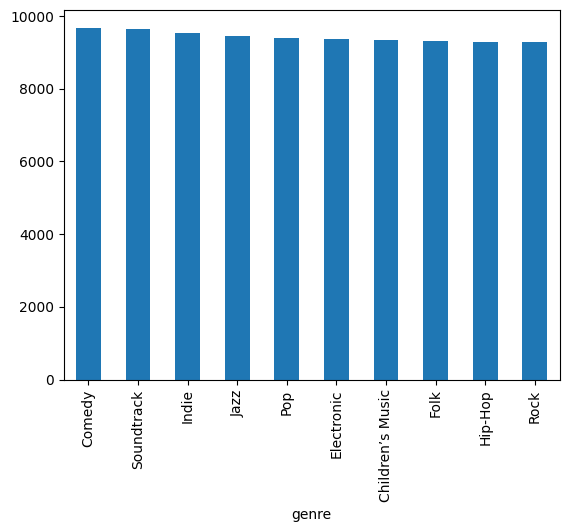

In [7]:
#Cuáles son los géneros musicales más representados en el dataset
df['genre'].value_counts().head(10).plot(kind='bar')

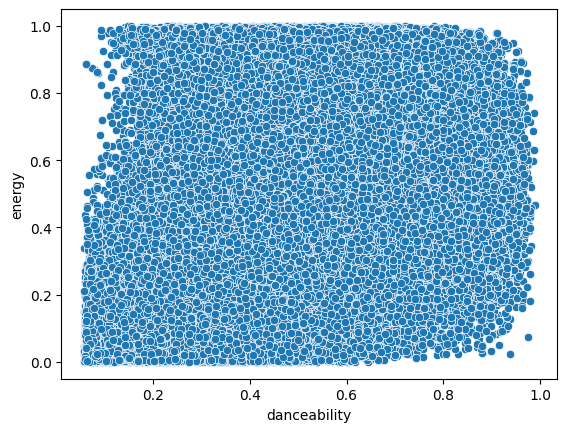

In [8]:
#Existe alguna correlación entre la "danceability(bailable)" y la "energy" de las canciones
import matplotlib.pyplot as plt

sns.scatterplot(x='danceability', y='energy', data=df)
plt.show()

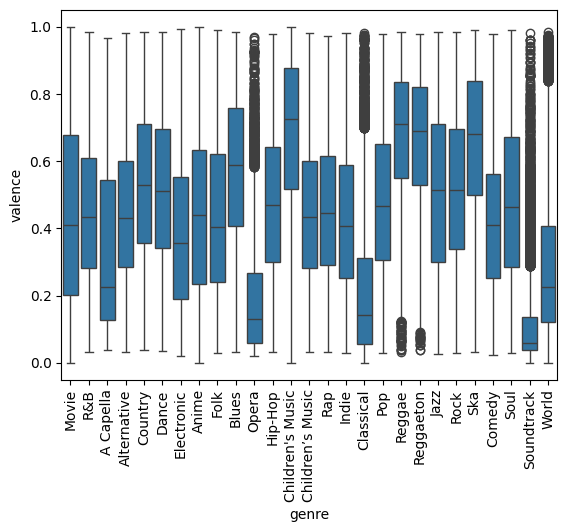

In [9]:
#Cómo varían las características como la "valence" (positividad musical) o el "tempo" entre diferentes géneros
sns.boxplot(x='genre', y='valence', data=df)
plt.xticks(rotation=90)
plt.show()

In [10]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Calcular la inercia para un rango de valores de k
# Vamos a probar k desde 1 hasta 15
inertia = []
k_range = range(1, 16)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

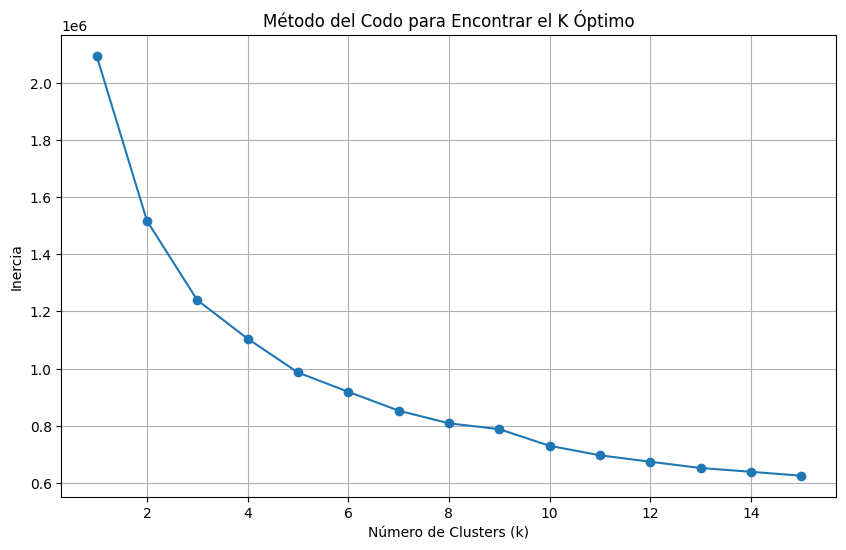

In [12]:
# 3. Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para Encontrar el K Óptimo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

In [13]:
# Suponiendo que el método del codo nos dice que k=5 es el óptimo
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_

In [14]:
# Calcular el índice de Calinski-Harabasz para un rango de valores de k
calinski_harabasz_scores = []
k_range = range(2, 16) # Requiere al menos 2 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    score = calinski_harabasz_score(X_scaled, kmeans.labels_)
    calinski_harabasz_scores.append(score)

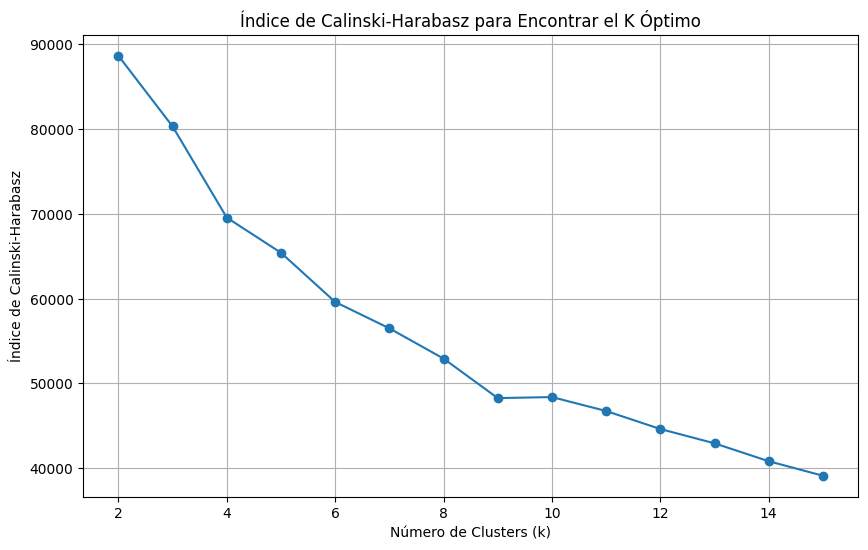

In [15]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(k_range, calinski_harabasz_scores, marker='o')
plt.title('Índice de Calinski-Harabasz para Encontrar el K Óptimo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Calinski-Harabasz')
plt.grid(True)
plt.show()

In [16]:
# Asignar los clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_


In [54]:
# Aplicar PCA para retener el 96% de la varianza
# PCA encontrará el número de componentes principales necesario para explicar el 96% de la varianza
pca = PCA(n_components=0.96, random_state=42)
X_pca = pca.fit_transform(X_scaled)

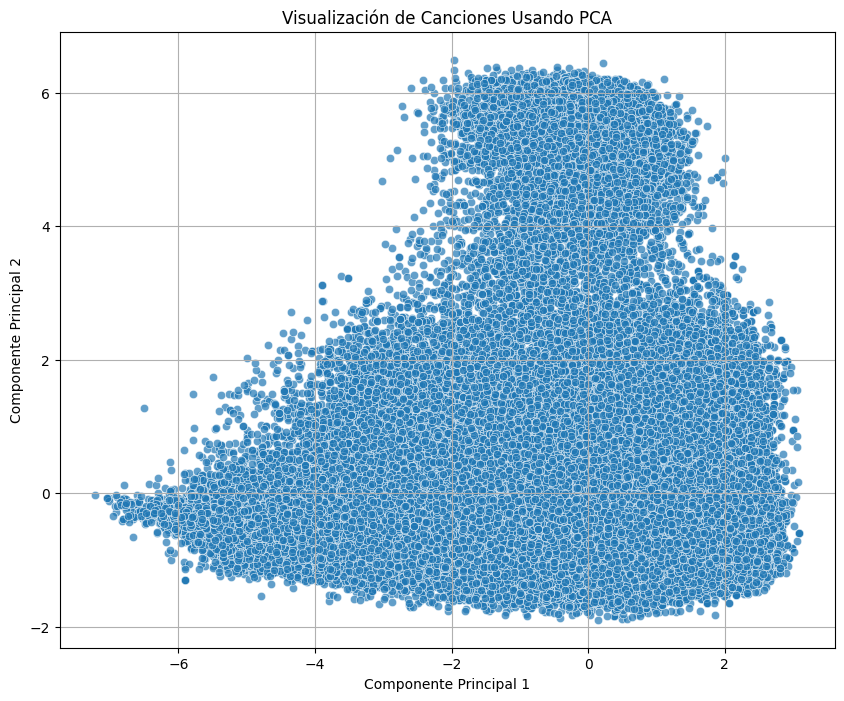

In [55]:
# Visualizar el resultado del PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.7)
plt.title('Visualización de Canciones Usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

In [56]:
# Opcional: Mostrar cuántas componentes fueron necesarias
print(f"Número de componentes principales necesarias para explicar el 96% de la varianza: {pca.n_components_}")

Número de componentes principales necesarias para explicar el 96% de la varianza: 8


In [57]:
pca.explained_variance_ratio_

array([0.38312835, 0.18022703, 0.12051695, 0.0931995 , 0.07730062,
       0.05805277, 0.04399771, 0.03076956])

In [58]:
pca.components_

array([[-0.42271807,  0.34036525,  0.46517713, -0.33299595,  0.05545084,
         0.47653366,  0.05337909,  0.16232028,  0.34471516],
       [ 0.22588513,  0.03391585,  0.04882586, -0.17338706,  0.64184297,
        -0.06209417,  0.67595274, -0.20597232, -0.01496001],
       [ 0.19692362,  0.57140653, -0.26568125, -0.11122248, -0.27759544,
        -0.14132596, -0.0051259 , -0.52892928,  0.4182511 ],
       [ 0.29420703,  0.19099197, -0.22793304, -0.03841751, -0.02484868,
        -0.22054678,  0.150785  ,  0.79044728,  0.35599658],
       [-0.13149666,  0.07433863,  0.22639885,  0.85565434,  0.20576773,
        -0.07508219,  0.03335227, -0.05265568,  0.37672128],
       [-0.1670655 ,  0.3920153 ,  0.0200616 ,  0.2526196 , -0.43719527,
         0.04756047,  0.54121921,  0.10961801, -0.50582403],
       [-0.19403378,  0.55026373, -0.27157058,  0.04689665,  0.5209177 ,
        -0.05490515, -0.40658609,  0.10591664, -0.36429444],
       [ 0.70393487,  0.1407932 ,  0.14297313,  0.17994614,  0

In [59]:
# Calcular la inercia para un rango de valores de k
# Vamos a probar k desde 1 hasta 15
inertia = []
k_range = range(1, 16)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

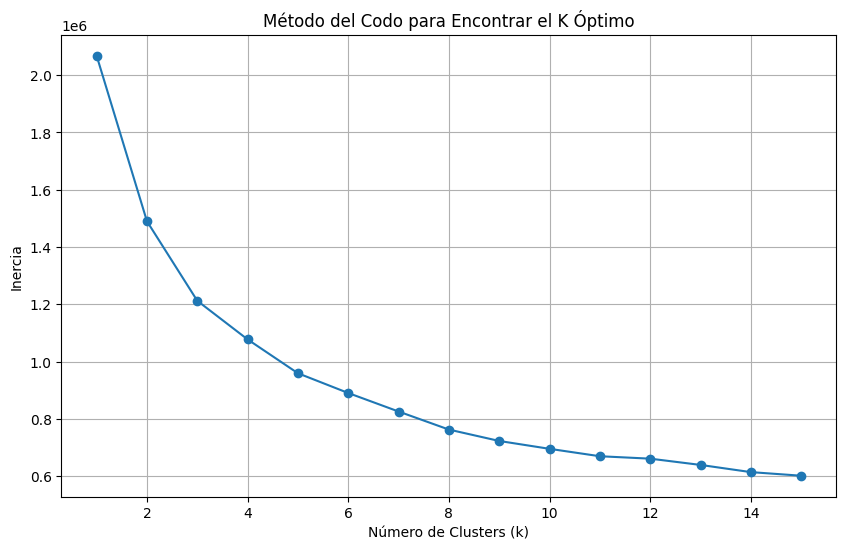

In [60]:
# . Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para Encontrar el K Óptimo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

In [61]:
# Aplicar K-Means para generar los agrupamientos
# Usaremos k=5, basándonos en el análisis del método del codo
kmeans = KMeans(n_clusters=6, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_pca)

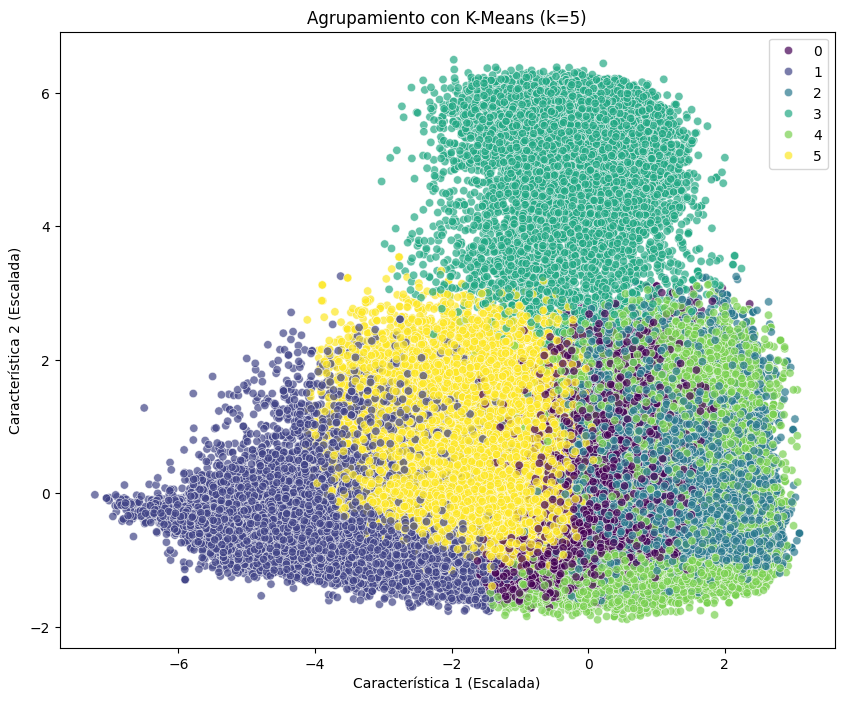

In [62]:
# Visualizar los clusters usando las primeras dos dimensiones
# Esto nos dará una primera impresión de cómo se ven los clusters.
plt.figure(figsize=(10, 8))
plt.title("Agrupamiento con K-Means (k=5)")
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', alpha=0.7)
plt.xlabel("Característica 1 (Escalada)")
plt.ylabel("Característica 2 (Escalada)")
plt.show()

In [63]:
#Añadir la columna de clusters al DataFrame original
df['cluster'] = clusters

In [64]:
# Generar la tabla de resumen
# Agrupar el DataFrame por el cluster y calcular la media de cada característica
summary_table = df.groupby('cluster')[features].mean()


In [65]:
# Mostrar la tabla
print(summary_table)

         acousticness  danceability    energy  instrumentalness  liveness  \
cluster                                                                     
0            0.139513      0.577402  0.660545          0.097541  0.183381   
1            0.835940      0.301493  0.174843          0.801567  0.141635   
2            0.231643      0.721402  0.668321          0.059262  0.175840   
3            0.791155      0.562664  0.664222          0.001234  0.729337   
4            0.121886      0.504619  0.779399          0.069972  0.259708   
5            0.788287      0.470622  0.280096          0.046682  0.186723   

          loudness  speechiness       tempo   valence  
cluster                                                
0        -6.890988     0.085656  108.198792  0.323577  
1       -20.666222     0.045576  103.419432  0.165424  
2        -7.263591     0.104253  111.039824  0.730657  
3       -11.990126     0.880174   97.878118  0.413324  
4        -5.845180     0.107083  157.702907  0.

In [66]:
#comparar en clauster
grup_table = df.groupby(['cluster','genre']).count()['track_id'].unstack().fillna(0).astype(int)

grup_table

genre    A Capella  Alternative  Anime  Blues  Children's Music  \
cluster                                                           
0                2         3514   1990   1820               188   
1                2           53   1761    134               446   
2               16         1979   1252   2833              2705   
3                0           20      0     28               164   
4                4         2861   3228   2423               383   
5               95          836    705   1785              1517   

genre    Children’s Music  Classical  Comedy  Country  Dance  ...   Pop   R&B  \
cluster                                                       ...               
0                    3592        352      59     2305   3218  ...  3299  3307   
1                      43       6759       0        4     23  ...    42    44   
2                    2017         44     200     2624   3394  ...  3198  2994   
3                      20         17    9079        7      2  ...    12    33   
4                    2796        329      88     2352   1749  ...  1883  1192   
5                     885       1755     255     1372    315  ...   952  1422   

genre     Rap  Reggae  Reggaeton  Rock   Ska  Soul  Soundtrack  World  
cluster                                                                
0        3619    1193       1268  2884  1639  2666         413   2824  
1          20      12          0   101     3   151        8383   1644  
2        3450    5771       5492  2591  3223  3083          64    887  
3          56      25         11     2    25    19           2      5  
4        1801    1481       2082  2662  3863  1080         132   1825  
5         286     289         74  1032   121  2090         652   1911  

[6 rows x 27 columns]

<Axes: xlabel='genre', ylabel='cluster'>

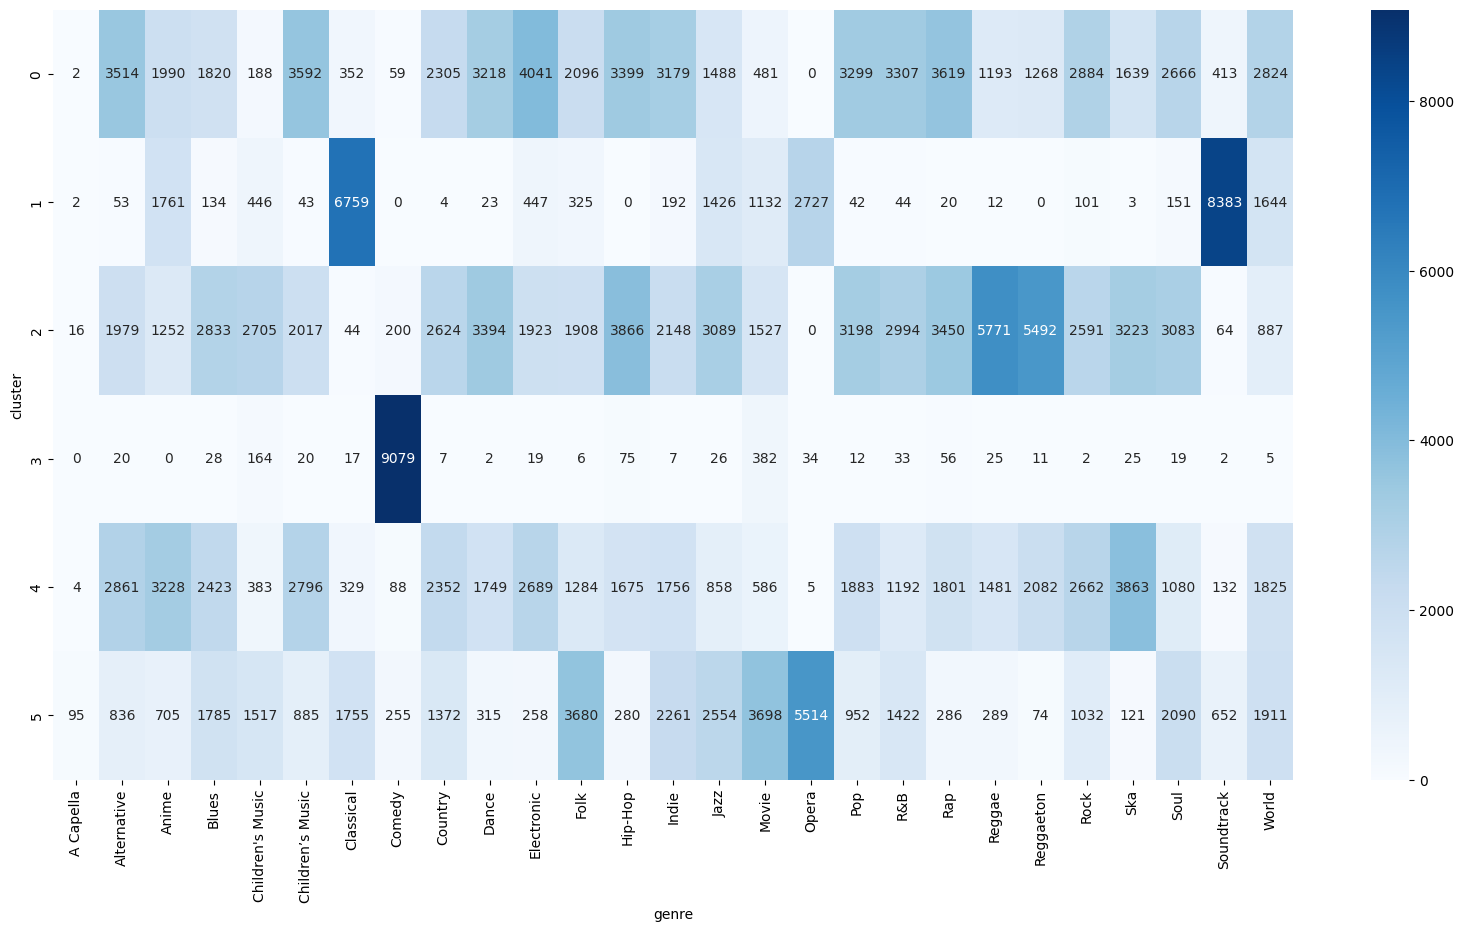

In [67]:
plt.figure(figsize=(20, 10))
sns.heatmap(grup_table, annot=True, fmt='d', cmap='Blues')

In [68]:
#Generar el pairplot
# Seleccionamos un subconjunto de características para que el gráfico sea más legible

#sns.pairplot(df, hue='cluster', vars=features[:4]) # Aquí usamos las primeras 4 características
#plt.suptitle('Pairplot de Características de Audio por Cluster', y=1.02)
#plt.show()

Conclusiones
Se aplicó el método del codo para determinar el número óptimo de clústeres, lo cual sugirió un valor de 5.
A continuación, se realizó un Análisis de Componentes Principales (PCA). Se determinó que se necesitan 8 componentes principales para explicar el 96% de la varianza total de los datos.
Posteriormente, se volvió a aplicar el método del codo sobre los datos transformados por PCA, lo que indicó que el número óptimo de clústeres se encuentra entre 5 y 6. Basado en un análisis detallado, se seleccionó 6 clústeres como la mejor opción para agrupar los datos musicales.

El agrupamiento se realizó utilizando el algoritmo K-Means. Los resultados se consolidaron en una tabla que muestra las características promedio de cada clúster, permitiendo una interpretación clara de los grupos:
•	Clúster 1: Se caracteriza por un alto porcentaje de energía y bailabilidad. Los géneros musicales asociados incluyen Acapella, Música para niños, Danza, Electrónica, Pop, R&B, World y Soul.
•	Clúster 2: Predominan las características acústicas e instrumentales. Los grupos principales en este clúster son Música para niños, Soundtrack y Ópera.
•	Clúster 3: Este grupo se enfoca en características como la bailabilidad, la energía y la positividad musical. Incluye géneros como Hip Hop, Jazz, Danza, Pop, Reggae, Reggaetón y Ska.
•	Clúster 4: Combina características acústicas con energía y positividad musical. El principal género encontrado en este grupo es la comedia.
En resumen, la división en 6 clústeres ofrece una distribución más detallada y significativa de los grupos musicales, lo que facilita la identificación de sus características predominantes y la asignación de géneros a cada segmento.
 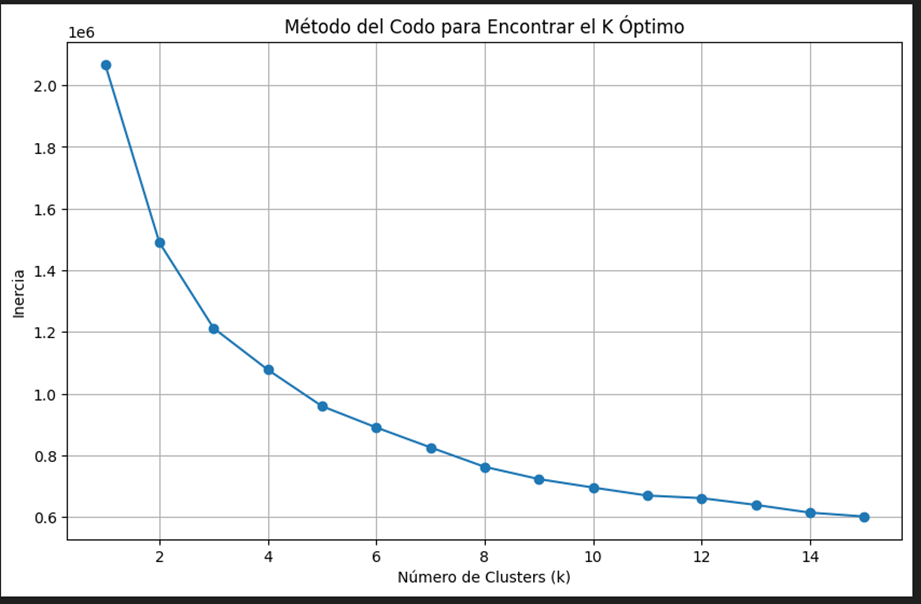

 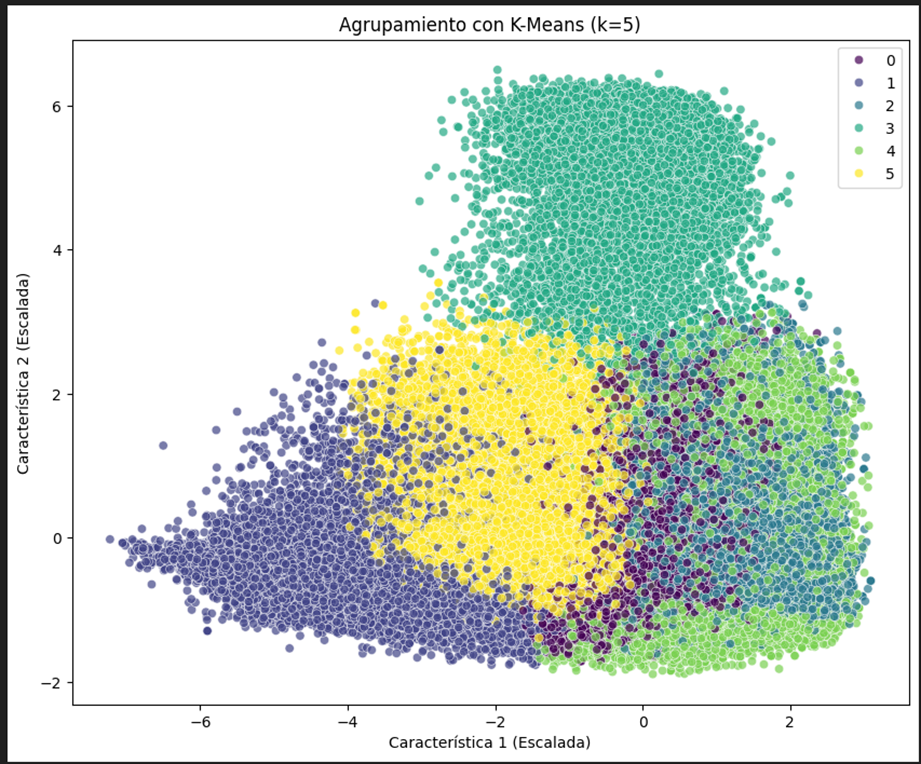

 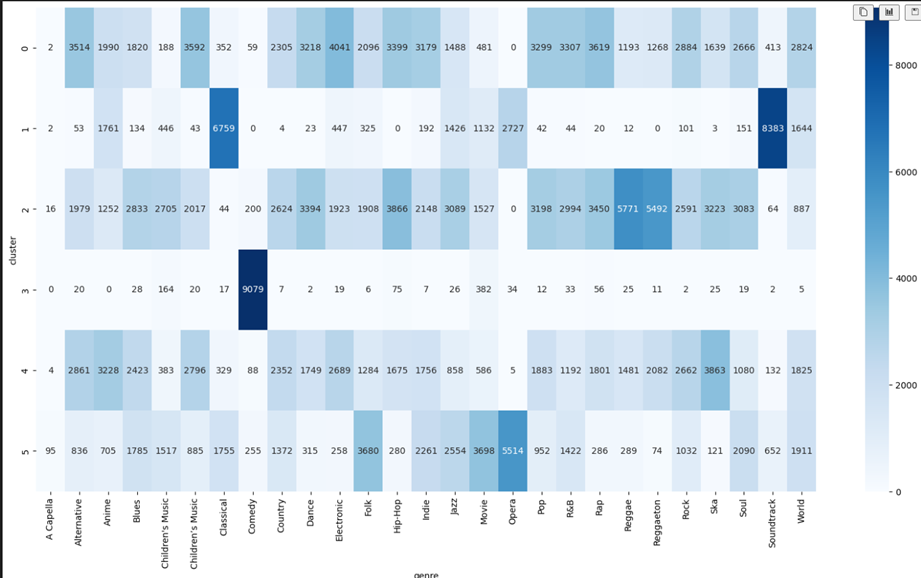
 
 
Se aplicó el método del codo para determinar la cantidad óptima de clústeres, lo que inicialmente sugirió 5 como el número ideal.
Posteriormente, se realizó un Análisis de Componentes Principales (PCA). Aunque se mencionó un componente con un valor de 2, la información clave es que se necesitaron 8 componentes principales para explicar el 96% de la varianza total de los datos.
Una vez aplicadas estas transformaciones, se volvió a usar el método del codo sobre los datos de PCA. Este segundo análisis indicó que la cantidad óptima de clústeres se encontraba entre 3 y 4.
Se aplicó el algoritmo K-Means para generar el agrupamiento, y el resultado final se consolidó en 3 clústeres, lo cual se consideró la mejor opción para una distribución óptima de los grupos musicales.
A continuación, se presenta el análisis de cada clúster:
•	Clúster 1: Este grupo se caracteriza por tener un alto porcentaje de energía y bailabilidad, mientras que el resto de las variables tienen un bajo porcentaje. Aquí se encuentran géneros como Acapella, Música para niños, Danza, Electrónica, Pop, R&B, World y Soul.
•	Clúster 2: Predominan las características acústicas y la energía. El género principal asociado a este grupo es la Comedia.
•	Clúster 3: Este clúster se enfoca en las características acústicas. Aquí se agrupan géneros como Clásica, Ópera y Soundtrack.
Finalmente, si bien el análisis inicial con el método del codo sugirió 3 clústeres, se propone explorar un modelo con 6 clústeres para un resultado más detallado y óptimo en el aprendizaje automático. Un mayor número de clústeres podría permitir una mejor separación de los géneros musicales, proporcionando una clasificación más precisa y permitiendo que el modelo distinga con mayor claridad las variables de cada grupo, obteniendo así información más rica y detallada.
 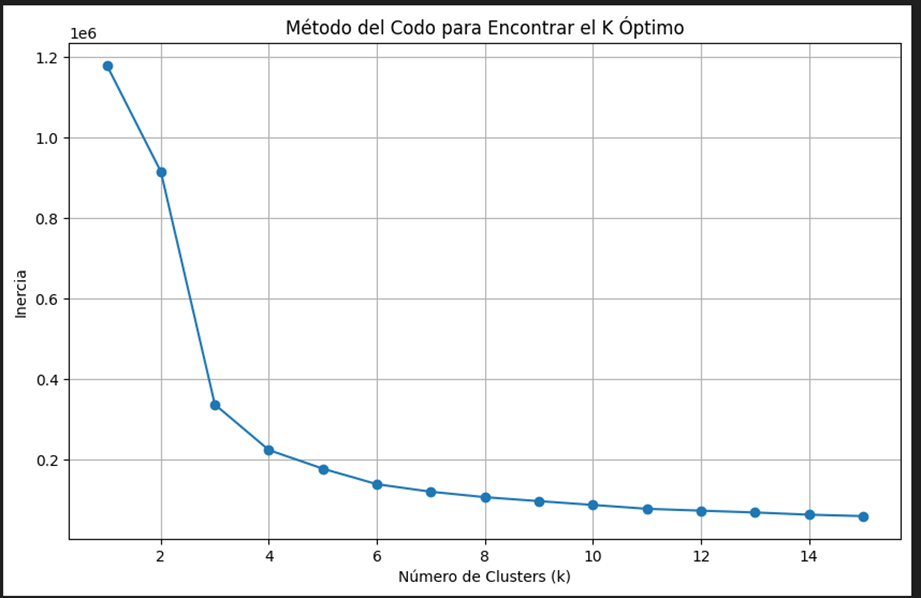

 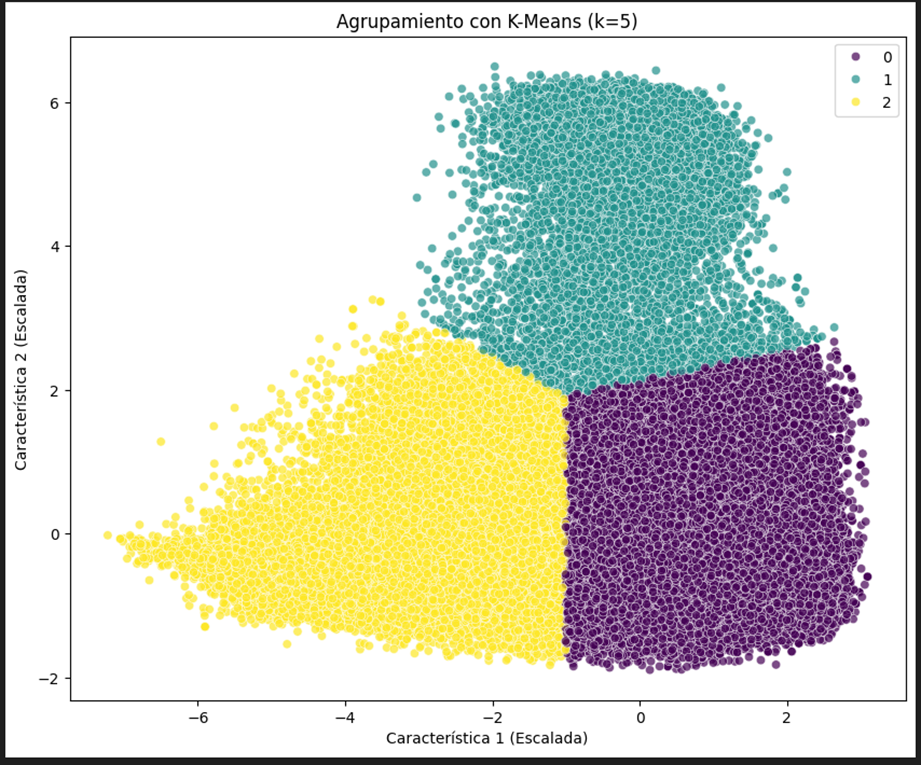

 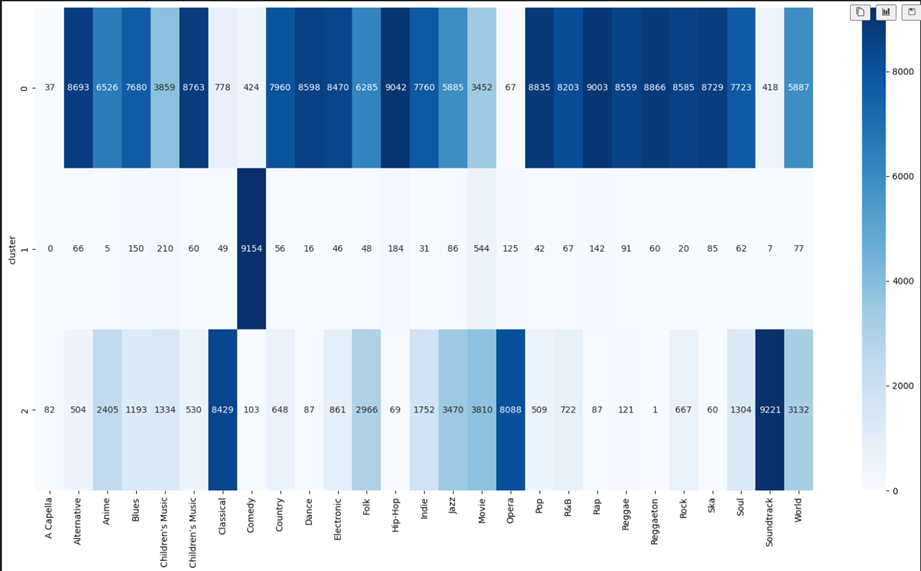

lo mas optimo es tomar 6 cluster con el fin de tener un resultado mas optimo en el aprendizaje dado que puede generar mejores especificaciones de los grupos y separar las variables por los géneros correspondientes es necesario para que aprenda a distinguir las diferentes variables que pueda obtener la mayor información posible
 
 
 



